In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

First guess at a and b are  2.0 1.0
First loss function is  500.15
Best a and b are  0.9390198950485866 0.47419724324276397
Best loss function is  1.3416095642628225


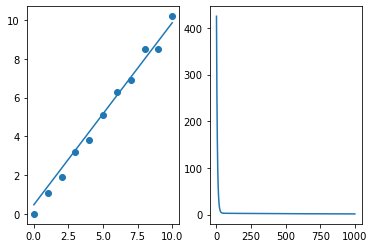

In [2]:
def linear(x,a,b):
    return a*x+b

def loss(x,y_obs,a,b):
    y_model = linear(x,a,b)
    return np.sum( (y_model-y_obs)**2 )

x = np.array( [0,1,2,3,4,5,6,7,8,9,10] )
y_obs = np.array( [0,1.1,1.9,3.2,3.8,5.1,6.3,6.9,8.5,8.5,10.2] )

a,b = 2.0, 1.0
y_model = linear(x,a,b)

print('First guess at a and b are ',a,b)
print('First loss function is ',loss(x,y_obs,a,b))

d_by_da = grad(loss,2)
d_by_db = grad(loss,3)

learning_rate = 0.0001
maximum_number_of_iterations = 1000

ssr = []

for iter in range(maximum_number_of_iterations):
    a -= learning_rate*d_by_da(x,y_obs,a,b)
    b -= learning_rate*d_by_db(x,y_obs,a,b)
    y_model = linear(x,a,b)
    ssr.append(loss(x,y_obs,a,b))
    
print('Best a and b are ',a,b)
print('Best loss function is ',loss(x,y_obs,a,b))

plt.subplot(1,2,1)
plt.scatter(x,y_obs)
plt.plot(x,y_model)

plt.subplot(1,2,2)
plt.plot(ssr)

plt.show()